## Chi-Square Test-

The test is applied when you have two categorical variables from a single population. 

It is used to determine whether there is a significant association between the two variables.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
churn_df = pd.read_csv('data/Telco-Customer-Churn.csv')

In [3]:
df = churn_df.copy()

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.shape

(7043, 21)

In [9]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

### Null Hypothesis: There is no relationship between two categorical variables.
### Alternate Hypothesis: There is a relationship between two categorical variables.

1. Check the relationship between **gender** and **Churn**

In [10]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [11]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

`First thing we will do is to Visualize the significance of relationship between the variables`

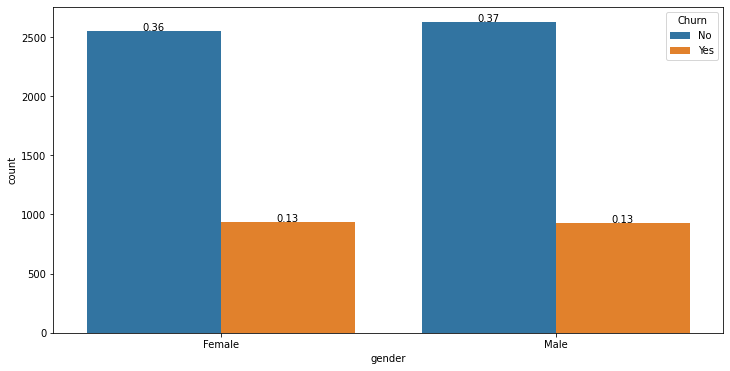

In [12]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x='gender', hue='Churn', data=df)

# showing the proportion of data 
for p in ax.patches:
    height = p.get_height() # getting the count
    ax.text(p.get_x() + p.get_width()/2,
            height+5,
            '{:1.2f}'.format(height/df.shape[0]),
            ha='center')    

**Observation:**
- From the countplot it is clear that there is no significant variation in Churn variable due to Gender variable.


`We will try to prove this with statistical test:`

**Chi-square statistics**

This test will show the significance of the relationship.

> X^2 = sum((Observed-Expected)^2/Expected)


`In order to perform Chi-square test we need to create a contingency table.`

`Contingency table shows the frequency (Observed values) for each categories of one categorical features w.r.t each category of another categorical variable.`

`Expected value for a cell = (Row count for that cell * Column count for that cell)/Total`

In [17]:
#print(pd.crosstab(index=df['gender'], columns=df['Churn'], margins=True))

gender_churn_ct = pd.crosstab(index=df['gender'], columns=df['Churn'])

gender_churn_ct

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [18]:
from scipy import stats

In [21]:
chi_2,p_value,dof,_ = stats.chi2_contingency([gender_churn_ct.iloc[0].values, 
                                                 gender_churn_ct.iloc[1].values])

In [22]:
print("Chi_2: ", chi_2)
print("p-value: ", p_value)
print("Degrees of Freedom: ", dof)

Chi_2:  0.4840828822091383
p-value:  0.48657873605618596
Degrees of Freedom:  1


`p-value is used to determine relationship between the two categorical variable is significant or not.
If the p-value is less than 0.05, this means there is a significant relationship between the given two categorical features.`

* Here, p value is almost around 0.5 which is a lot more than 0.05 and chi_2 value is also very small.

* Since, p-value is > 0.05 we are failing to reject Null Hypothesis, there is no relationship between Gender and Churn.

* So, higher the chi_2 value is more possibility of relationship.

2. Check the relationship between **PaperlessBilling** and **Churn**

In [23]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

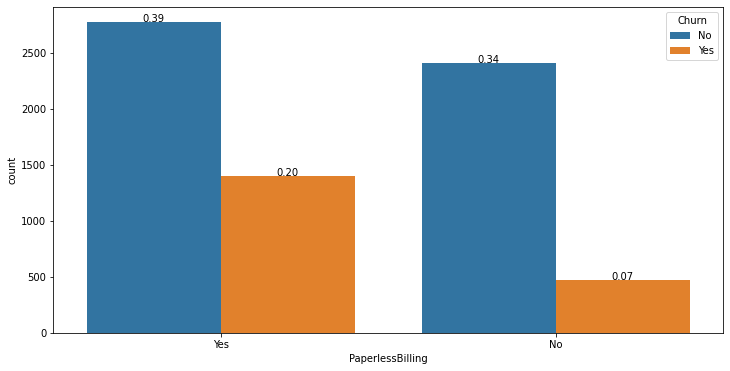

In [24]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x='PaperlessBilling', hue='Churn', data=df)

# showing the proportion of data 
for p in ax.patches:
    height = p.get_height() # getting the count
    ax.text(p.get_x() + p.get_width()/2,
            height+5,
            '{:1.2f}'.format(height/df.shape[0]),
            ha='center')    

**Observation:**
- From the countplot it is seems like there is some variation in Churn variable due to PaperlessBilling variable so some sort of relationship does exists.
- Whereas as per domain knowledge there should be no relation between these two variables.


In [25]:
plb_churn_ct = pd.crosstab(index=df['PaperlessBilling'], columns=df['Churn'])

plb_churn_ct

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [26]:
chi_2,p_value,dof,_ = stats.chi2_contingency([plb_churn_ct.iloc[0].values, 
                                              plb_churn_ct.iloc[1].values])

In [27]:
print("Chi_2: ", chi_2)
print("p-value: ", p_value)
print("Degrees of Freedom: ", dof)

Chi_2:  258.27764906707307
p-value:  4.073354668665985e-58
Degrees of Freedom:  1


`p-value is used to determine relationship between the two categorical variable is significant or not.
If the p-value is less than 0.05, this means there is a significant relationship between the given two categorical features.`

* Here, p value is almost close to 0 and chi_2 value is also large.

* Since, p-value is < 0.05, we will reject the Null Hypothesis, there is significant relationship between PaperlessBilling and Churn.

* So, higher the chi_2 value is more possibility of relationship.